In [43]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Total record count = 891
Inferences : 
age [714] - needs correction, may be replace empty with median value
embarked [889],  - 2 missing values - might be we use mode - most frequent value
deck[203] - most of values, cant trust it better drop the column
embark_town [889] -2 missing values - might be not required -can be dropped


In [45]:
# Drop less useful or high-missing columns
df.drop(columns= ['deck', 'embark_town'], inplace=True)

# Fill missing age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill embarked with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop rows with any remaining missing values
df.dropna(inplace=True)

# Confirm cleanup
df.isnull().sum()

C:\Users\dhana\AppData\Local\Temp\ipykernel_56768\1433506733.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\dhana\AppData\Local\Temp\ipykernel_56768\1433506733.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

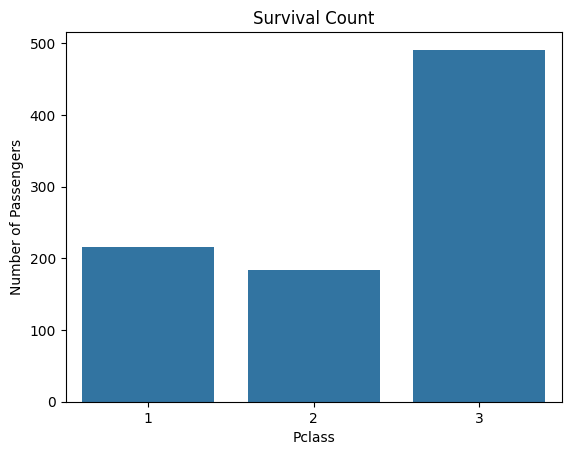

In [46]:
sns.countplot(x='pclass', data=df)
plt.title('Survival Count')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.show()

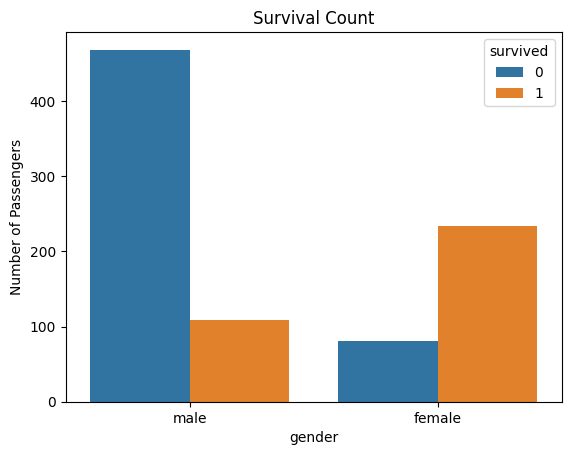

In [47]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count')
plt.xlabel('gender')
plt.ylabel('Number of Passengers')
plt.show()

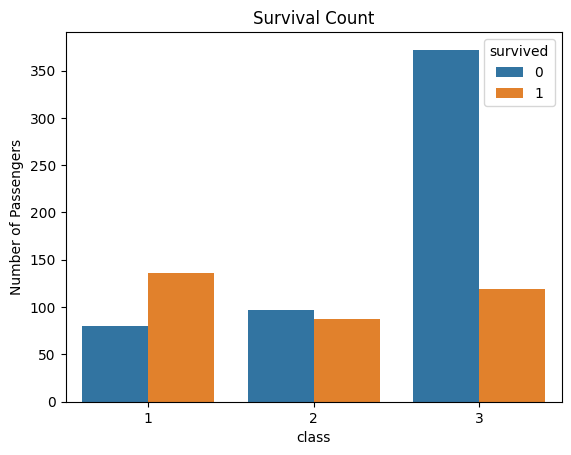

In [48]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count')
plt.xlabel('class')
plt.ylabel('Number of Passengers')
plt.show()

In [49]:
df.to_csv('titanic_cleaned.csv', index=False)